In [30]:
from database_def import Record
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

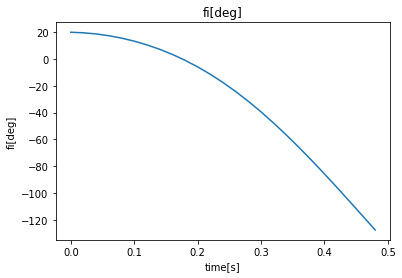

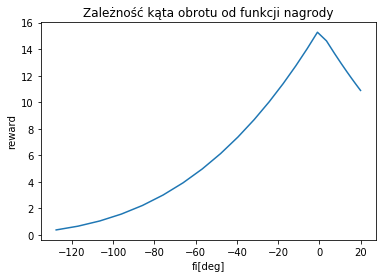

In [47]:
r = Record()
r.position_set(20)
r.move([(500, 0.5)])
r.visualize(['fi'], r.last_movement)
plt.figure()
plt.plot(r.last_movement['fi[deg]'], give_reward(r.last_movement)['fi'])
plt.ylabel('reward')
plt.xlabel('fi[deg]')
plt.title("Zależność kąta obrotu od funkcji nagrody")
plt.show()

In [37]:
def give_reward(record, **kwargs):
    param = {
        'fi_mul': 0.5,
        '_fi_mul': 5,
        '__fi_mul': 1,
        '_fi_max': 30,
        '__fi_max': 100
    }
    for key in kwargs:
        param[key] = kwargs[key]
    reward = pd.DataFrame()

    reward['fi'] = param['fi_mul'] * np.power(np.abs((record['fi'] % (2 * np.pi) - np.pi)), 3)
    reward['_fi'] = param['_fi_mul'] * np.abs(np.abs(record['_fi']) - param['_fi_max']) - param['_fi_max'] * param[
        '_fi_mul']
    reward['__fi'] = param['__fi_mul'] * np.abs(np.abs(record['__fi']) - param['__fi_max']) - param['__fi_max'] * \
                         param['__fi_mul']
    reward['total'] = reward['__fi'] + reward['_fi'] + reward['fi'] + 50

    return reward